# Исследование надежности заемщиков


## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [14]:
data.duplicated().sum()

54

In [15]:
data = data.drop_duplicates()

**Задание 15. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [16]:
data['education'] = data['education'].str.lower()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследуйте данные и ответьте на вопросы

**Задание 19. Есть ли зависимость между количеством детей и возвратом кредита в срок?**

In [22]:

#data.info()
data_pivot1 = data.pivot_table(index=['debt'], columns='children', values = 'family_status_id', aggfunc='count') #сводная таблица
#data_pivot1.head() c помощью сводной таблицы я вижу количество записей по каждой категории. Потом считаю отношение просроченных к общему 
"""Видим количества записей с группировкой по количеству детей в семье, 
из всего датасета только 9 записей у которых 5 детей, 
и ни одной с просроченной задолженностью; строка неинформативна, ее учитывать не буду"""
children0 = data_pivot1[0][1] / (data_pivot1[0][0] + data_pivot1[0][1]) * 100
children1 = data_pivot1[1][1] / (data_pivot1[1][0] +  data_pivot1[1][1])* 100
children2 = data_pivot1[2][1] / (data_pivot1[2][0] + data_pivot1[2][1])* 100
children3 = data_pivot1[3][1] / (data_pivot1[3][0] + data_pivot1[3][1])* 100
children4 = data_pivot1[4][1] / (data_pivot1[4][0] + data_pivot1[4][1])* 100
print('Нет детей:', children0)
print('Один ребёнок:', children1)
print('Двое детей:', children2)
print('Трое детей:', children3)
print('Четверо детей:', children4)

Нет детей: 7.535266179910682
Один ребёнок: 9.23268870867124
Двое детей: 9.4541910331384
Трое детей: 8.181818181818182
Четверо детей: 9.75609756097561


Можно по-другому разбить группы и сравнить, например, три категории: нет детей, 1, 2 и больше:
Добавим новую группировку:

In [23]:
def categorize_children(children):
    try:
        if children == 0:
            return 'Нет детей'
        elif children == 1:
            return 'Один ребёнок'
        else:
            return '2 и более'
    except:
        pass
data['child_category_1'] = data['children'].apply(categorize_children)
#data_pivot1 = data.pivot_table(index=['debt'], columns='child_category_1', values = 'family_status_id', aggfunc='count') 
#сгруппируем данные и найдем конверсию по просроченным выплатам
child_conv = pd.DataFrame()
child_conv['sum'] = data.groupby('child_category_1')['debt'].sum()
child_conv['count'] = data.groupby('child_category_1')['debt'].count()
child_conv['result'] = child_conv['sum'] / child_conv['count']
child_conv

,sum,count,result
child_category_1,,,
2 и более,225,2432,0.092516
Нет детей,1063,14107,0.075353
Один ребёнок,444,4809,0.092327


При делении на три группы видно, что вероятность просрочки одинакова у групп с одним ребенком и двумя и более, сделаем еще одну группировку: Есть дети и Нет детей. 

In [24]:
def categorize_children(children):
    try:
        if children > 0:
            return 'Есть дети'
        else:
            return 'Нет детей'
    except:
        pass
data['child_category_2'] = data['children'].apply(categorize_children)
data_pivot1 = data.pivot_table(index=['debt'], columns='child_category_2', values = 'family_status_id', aggfunc='count')
child_conv_1 = pd.DataFrame()
child_conv_1['sum'] = data.groupby('child_category_2')['debt'].sum()
child_conv_1['count'] = data.groupby('child_category_2')['debt'].count()
child_conv_1['result'] = child_conv_1['sum'] / child_conv_1['count']
child_conv_1

,sum,count,result
child_category_2,,,
Есть дети,669,7241,0.092391
Нет детей,1063,14107,0.075353


Сейчас можно утверждать, что кредитополучатели без детей будут чаще платить по кредиту в срок, чем кредитополучатели с детьми. Разница между этими значениями составляет 18%.

In [25]:
child_conv = ((child_conv_1['result'][0] - child_conv_1['result'][1]) / child_conv_1['result'][0])*100
print(child_conv)

18.441162318784382


**Вывод:** Мы можем с уверенность утверждать что с появлением детей у кредитополучатлей увеличивается вероятность просрочки по кредиту, в среднем количество просрочек увеличится на 18%. Разницы между группами по количеству детей на этих данных я не установил. Отвечая на вопрос, можно говорить о том, что есть зависимость между наличием детей в семье и возвратом кредита в срок. Наличие детей увеличивает возможность просрочки выплаты по кредиту.

**Задание 20. Есть ли зависимость между семейным положением и возвратом кредита в срок?**

In [27]:
data_tmp = data.pivot_table(index=['family_status'], columns='debt', values='purpose', aggfunc='count')

data_tmp

debt,0,1
family_status,,
Не женат / не замужем,2523,273
в разводе,1105,84
вдовец / вдова,888,63
гражданский брак,3761,385
женат / замужем,11339,927


In [28]:
data_tmp['ratio'] = data_tmp[1] / (data_tmp[0] + data_tmp[1])

data_tmp

debt,0,1,ratio
family_status,,,
Не женат / не замужем,2523,273,0.097639
в разводе,1105,84,0.070648
вдовец / вдова,888,63,0.066246
гражданский брак,3761,385,0.092861
женат / замужем,11339,927,0.075575


In [30]:
# если sum дклить на count - это будет mean

data.groupby('family_status')['debt'].mean().sort_values(ascending=True)

family_status
вдовец / вдова           0.066246
в разводе                0.070648
женат / замужем          0.075575
гражданский брак         0.092861
Не женат / не замужем    0.097639
Name: debt, dtype: float64

Для наглядности можно нарисовать столбчатую диаграмму вероятности просрочки в зависимости от семейного положения

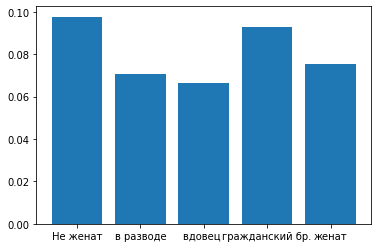

In [31]:
import matplotlib.pyplot as plt
plt.bar(['Не женат', 'в разводе', 'вдовец ','гражданский бр.', 'женат', ], family_st['result'])
plt.show()

**Вывод:** Да, зависимость есть. Можно сказать, что неженатые/незамужние или люди в гражданском браке чаще имеют задолженность по кредиту, а те, кто развелся или овдовел, реже пропускают оплаты по кредиту.

<AxesSubplot:ylabel='result'>

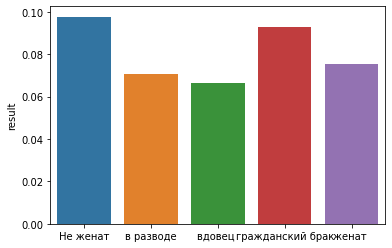

In [32]:
import seaborn as sbs
sbs.barplot(x=['Не женат', 'в разводе', 'вдовец ','гражданский брак', 'женат '], y=family_st['result'])

**Задание 21. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

In [33]:
#data_pivot_3 = data.pivot_table(index=['debt'], columns='total_income_category', values='family_status_id', aggfunc='count')
#data_pivot_3
income_st = pd.DataFrame()
income_st['sum'] = data.groupby('total_income_category')['debt'].sum()
income_st['count'] = data.groupby('total_income_category')['debt'].count()
income_st['result'] = income_st['sum'] / income_st['count']
income_st.sort_values('result', ascending = False)

,sum,count,result
total_income_category,,,
E,2,22,0.090909
C,1353,15938,0.084891
A,2,25,0.080000
B,354,5014,0.070602
D,21,349,0.060172


Глядя на таблицу, можно сказать, что люди с более низким доходом имеют меньшее количество просрочек по кредитам, но говорить о какой-то очевидной зависимости трудно. Посчитаем корреляцию между уровнем дохода и долгом:

In [34]:
verific_corr = pd.DataFrame()
verific_corr['total_income'] = data['total_income']
verific_corr['debt'] = data['debt']
verific_corr.corr()

,total_income,debt
total_income,1.000000,-0.012596
debt,-0.012596,1.000000


Видим что корреляции между доходом и наличием просрочки по кредиту нет.

**Вывод:** Зависимости между уровнем дохода и возвратом кредита в срок нет.

**Задание 22. Как разные цели кредита влияют на его возврат в срок?**

In [35]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
purpose_df = pd.DataFrame()
purpose_df['sum'] = data.groupby('purpose_category')['debt'].sum()
purpose_df['count'] = data.groupby('purpose_category')['debt'].count()
purpose_df['result'] = purpose_df['sum'] / purpose_df['count']
purpose_df.sort_values('result', ascending = False)

,sum,count,result
purpose_category,,,
операции с автомобилем,400,4281,0.093436
получение образования,369,3989,0.092504
проведение свадьбы,183,2324,0.078744
операции с недвижимостью,780,10754,0.072531


**Вывод:** Можно утверждать, что люди с большей вероятностью выплачивают кредит, если он взят на операции с недвижимостью, а так же реже имеют просрочку по выплатам взявшие кредит на проведение свадьбы (видимо до сих пор молодоженам дарят деньги). Чаще всего имеют просрочку по кредитам свзянным с автомобилями и получением образования.

**Задание 23. Приведите возможные причины появления пропусков в исходных данных.**

*Ответ:* Я бы отнес пропуски в этом датафрейме к механизму образования MNAR (Missing Not At Random). Это пропуски, которые мы не можем восстановить, основываясь на другой информации, если невозможно установить причину их возниковения, и они будут влиять на наши какие-то исследования с данными, мы должны минимизировать их вред для наших выводов. 

Причины возникновения тоже рандомные могут быть: человеческий фактор (кто-то просто не заполнил форму на сайте, ошибка при переносе), потеря данных, данные собирались из разных источников и просто этой информации не было.

**Задание 24. Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.**

*Ответ:* Потому что таким образом мы меньше всего искажаем статистику и можем делать выводы по группам, как-то группировать данные по категориям. Если мы удалим пропуски, то они в нашем случаем повлияют на количество наблюдений, для наших задач это важно, поэтому заполняем их значениями, которые меньше всего повлияют на значения по отношению к таким же у других наблюдений.

Медиана показывает середину по частоте встречаемости значения, а среднее - это сумма всех делить на количество. Можно привести пример с заработной платой, когда средняя за счёт очень высокой зарплаты 2 руководителей будет гораздо выше медианного значения, и именно медиана будет правильнее говорить о размере самой частовстречающейся зарплаты. Если мы будем в таком случае заполнять пропуски средним значением, то у нас в общем на всех вырастет уровень дохода, и потом, когда будем находить отношения групп, проценты будут меньше, медиана меньше будет влиять на конечный результат.

## Общий вывод.


Было проведено исследование, оценивающее влияние различных факторов на погашение кредита в срок. Исследуемые данные - статистика о платежах клиентов. Результатом исследования будет система, которая может оценить способность потенциального заемщика вернуть кредит банку.

Перед началом исследования были выдвинуты гипотезы:

* Гипотеза 1: Количество детей влияет на факт погашения кредита в срок;
* Гипотеза 2: Семейное положение влияет на факт погашения кредита в срок;
* Гипотеза 3: Уровень дохода влияет на факт погашения кредита в срок;
* Гипотеза 4: Цель кредита влияет на факт погашения кредита в срок;

В результате исследования удалось установить зависимости:

# Гипотеза 1 частично подтверждена:
**Наличие детей в среднем увеличивает частоту просрочек по кредитам, а именно:**
* 7,54% - Количество просроченных кредитов у заемщиков без детей
* 9,24% - Количество просроченных кредитов у заемщиков, у которых есть дети

**для более точных выводов по клиентам с 3 детьми и больше у нас недостаточно данных, можно провести дополнительное исследование на большей выборке данных.**

**По исходным данным, получается что кредитополучатели с детьми на имеют более частые просрочки по выплатам, чем без детей. Абсолютная разница по вероятности просрочки у семей с детьми больше на 18%**

# Гипотеза 2 подтверждена:

* У неженатых/незамужних (**9,8% просрочек**) и у тех, у кого официально не зарегистрирован брак (**9,3% просроченных выплат**) вероятность стать должником выше.
* Вдовцы/вдовы (**6,6%**), женатые/замужние (**7,6% просрочек**) и разведенные (**7,1%**) менее вероятно становятся должниками

# Гипотеза 3 частично подтверждена:
**Выборки недостаточно для формирования однозначных выводов**
Можно сказать:
* По категориям с самым малым и самым большим доходом (Е и А) очень мало данных и вывод по ним неочевиден, их мы учитывать не можем.
* Если берем для анализа группы B,C,D - то по полученным данным можно сказать, что люди с большей ЗП чаще возвращают кредит в срок. Но говорить об однозначной зависимости в этих категориях по имеющимся данным нельзя.

Рекомендация: провести дополнительное исследование на большей выборке данных.

# Гипотеза 4 подтверждена:

**Зависимость между целью кредита и фактом погашения в срок есть, а именно:**

* 7,3% - доля просроченных кредитов на операции с недвижимостью
* 7,9% - доля просроченных кредитов на проведение свадьбы
* 9,3% - доля просроченных кредитов связанных с получением образования 
* 9,3% - доля просроченных кредитов взятых на операции с автомобилями

Рекомендация: разбег между значениями есть, но он небольшой, поэтому не стоит наделять эту зависимость высоким весом при принятии решения о кредитоспособности клиента.

**Общие рекомендации:**

1. Специалистам, которые занимаются построением модели кредитного скоринга, можно использовать зависимости гипотез 2 и 4. Можно использовать статус семейного положения и цель кредита для оценки кредитоспособности клиента.
2. С осторожностью можно принимать во внимание, что семьи с детьми в среднем имеют большее количество просрочек по кредиту, но руководствоваться только этим при выдаче кредита не стоит. По количеству доходов тоже нельзя говорить о какой-то корреляции. Для ответа на эти вопросы понадобится большая выборка данных.  
